In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

# X has 64 var (8x8 img) and approx 1700 obs
X = digits.data

y = digits.target
y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1 # one hot target or shape NxK

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1])) # weights of shape KxL

best_W = None
best_accuracy = 0
lr = 0.1
nb_epochs = 500
mbs = 1000
minibatch_size = len(y) // mbs

losses = []
lossesTest = []
lossesValid = []
accuracies = []


def softmax(x):
    # Function tested OK ( == 1 for each indiv)
    # assurez vous que la fonction est numeriquement stable
    # eg softmax(np.array([1000, 10000, 100000], ndmin=2))
    # -> minus max to avoid overflow
    x -= np.max(x)

    softmaxval = (np.exp(x).T / np.sum(np.exp(x), axis=1)).T
    return softmaxval


def get_accuracy(X, y, W):
    # should return a percentage of accuracy (you evaluate nb of good guess on nb of total guesses)
    y_pred = softmax(X.dot(W.T))

    prediction = np.argmax(y_pred, axis = 1)
    reality = np.argmax(y, axis = 1)
    acc = np.sum(reality == prediction) / y.shape[0]
    return acc


def get_grads(y, y_pred, X):
    # Should be OK, math behind the scene to review
    # return the gradient
    m = X.shape[0] # nb indiv

    prod = np.dot(X.T, (y - y_pred))
    grad = (-1 / m) * prod

    return grad.T


def get_loss(y, y_pred):
    # we need to perform additional operations to reduce the value, otherwise too big
    # cross entropy rather than nll
    # 1 : average over sample size (/m)
    # 2 : consider only the y == true misses (/nb classes) (because one hot too)
    m = y.shape[0] # nb indiv
    return (-1/m) * np.sum(y * np.log(y_pred))


In [128]:
for epoch in range(nb_epochs):
    loss = 0
    accuracy = 0

    for i in range(0, X_train.shape[0], minibatch_size):
        # work on current batch from train partition
        # predict (we need to transpose W for matrix mult)
        y_pred = softmax(np.dot(X_train[i: i + minibatch_size], W.T))

        # compute error and store it
        error = get_loss(y_train[i: i + minibatch_size], y_pred)
        loss += error

        # update W
        grads = get_grads(y_train[i: i + minibatch_size], y_pred, X_train[i: i + minibatch_size])
        W -= (lr * grads)

    losses.append(loss)  # compute the loss on the train test
    lossesTest.append(get_loss(y_test, softmax(np.dot(X_test, W.T))))
    lossesValid.append(get_loss(y_validation, softmax(np.dot(X_validation, W.T))))

    accuracy = get_accuracy(X_validation, y_validation, W)
    accuracies.append(accuracy)  # compute the accuracy on the validation test

   # print(accuracy)
    if accuracy > best_accuracy:
        best_W = W.copy()  # select the best parameters based on the validation accuracy
        best_accuracy = accuracy

/Users/sebastienhenwood/PycharmProjects/inf8225/venv/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log
/Users/sebastienhenwood/PycharmProjects/inf8225/venv/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in multiply
/Users/sebastienhenwood/PycharmProjects/inf8225/venv/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


In [129]:
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print(accuracy_on_unseen_data)  # 0.89750692508

0.7814814814814814


/Users/sebastienhenwood/PycharmProjects/inf8225/venv/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


In [130]:
# print(lossesTest)

In [131]:
# print(lossesValid)

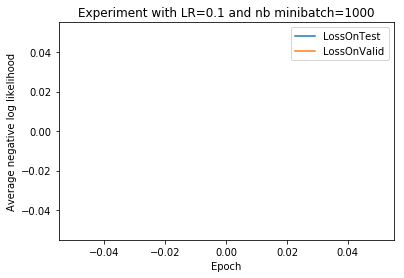

In [ ]:
# plt.plot(losses, label='LossOnTrain')
plt.plot(lossesTest, label='LossOnTest')
plt.plot(lossesValid, label='LossOnValid')
plt.ylabel('Average negative log likelihood')
plt.xlabel('Epoch')
plt.title('Experiment with LR={} and nb minibatch={}'.format(lr, mbs))
plt.legend()
plt.show()

In [ ]:
plt.imshow(best_W[4, :].reshape(8,8))
